In [1]:
import sys
sys.path.append('../src')

In [2]:
import timm
import pandas as pd
import numpy as np
import pytorch_lightning as pl

from config import cfg
from dataset import CassavaLeafDataModule
from train import CassavaLeafModel
from sklearn.model_selection import StratifiedKFold

In [3]:
df_train = pd.read_csv('../input/train.csv')
folds = StratifiedKFold(
    n_splits=cfg.data.num_folds, 
    shuffle=True, 
    random_state=cfg.seed).split(
        np.arange(df_train.shape[0]), df_train.label.values)

trainer = pl.Trainer(**cfg.train)


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [4]:
model = timm.create_model(model_name='swsl_resnext50_32x4d', pretrained=True)

In [5]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act3): ReLU(inplace=True)
      (do

In [4]:
for fold, (trn_idx, val_idx) in enumerate(folds):
    dm = CassavaLeafDataModule(df_train, trn_idx, val_idx)
    dm.setup()
    model = CassavaLeafModel()
    lr_finder = trainer.tuner.lr_find(model, dm)
    break


  | Name    | Type                       | Params
-------------------------------------------------------
0 | model   | EfficientNet               | 17.6 M
1 | acc     | Accuracy                   | 0     
2 | loss_fn | CrossEntropyWithLogitsLoss | 0     
-------------------------------------------------------
17.6 M    Trainable params
0         Non-trainable params
17.6 M    Total params
Finding best initial lr: 100%|██████████| 100/100 [02:07<00:00,  1.10it/s]Restored states from the checkpoint file at e:\cldc\notebook\lr_find_temp_model.ckpt


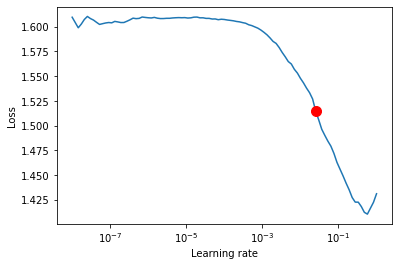

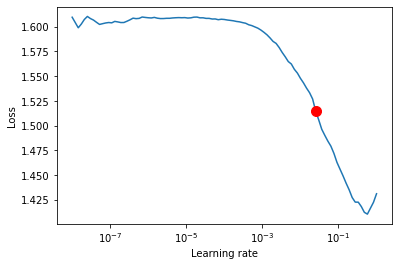

In [5]:
lr_finder.plot(suggest=True)

In [6]:
lr_finder.suggestion()

0.025118864315095822

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [9]:
yp = torch.rand(16, 5)
y = F.softmax(torch.rand(16, 5), dim=1)

In [11]:
y

tensor([[0.2391, 0.2662, 0.1631, 0.1699, 0.1618],
        [0.2132, 0.2453, 0.2425, 0.1273, 0.1717],
        [0.2671, 0.2600, 0.1757, 0.1421, 0.1550],
        [0.2247, 0.2149, 0.1738, 0.1687, 0.2179],
        [0.1465, 0.1603, 0.2543, 0.2470, 0.1919],
        [0.1820, 0.1928, 0.1357, 0.2238, 0.2658],
        [0.1514, 0.1763, 0.3107, 0.1815, 0.1801],
        [0.2098, 0.1648, 0.2505, 0.1340, 0.2409],
        [0.1569, 0.2381, 0.1808, 0.2786, 0.1456],
        [0.2472, 0.2201, 0.2489, 0.1796, 0.1041],
        [0.1793, 0.2296, 0.2646, 0.1979, 0.1286],
        [0.2111, 0.1847, 0.1803, 0.2417, 0.1822],
        [0.1650, 0.2656, 0.2619, 0.1791, 0.1285],
        [0.2329, 0.1401, 0.2563, 0.1809, 0.1898],
        [0.1278, 0.2481, 0.1826, 0.2778, 0.1638],
        [0.2392, 0.2015, 0.2123, 0.1901, 0.1570]])

In [12]:
yp.argmax(dim=-1)

tensor([1, 3, 1, 3, 2, 4, 3, 2, 4, 1, 1, 3, 4, 1, 2, 0])

In [20]:
y.gather(index=yp.argmax(dim=-1)[None], dim=-1) * loss

tensor([[-0.0451, -0.2622,  0.3669,  0.3744,  0.0130, -0.1945,  0.0737, -0.1418,
          0.1161,  0.2031, -0.3954, -0.0729,  0.1671,  0.0958,  0.0368,  0.3410]])

In [33]:
%reload_ext autoreload
%autoreload 2

from loss import CrossEntropyWithLogitsLoss, FocalLoss

weight = torch.tensor([0.2, 0.25, 0.25, 0.05, 0.25])
yp = FocalLoss(CrossEntropyWithLogitsLoss(weight=weight))(yp, y)

In [1]:
net = timm.create_model(model_name='tf_efficientnet_b4_ns', pretrained=True)
# model = CassavaLeafModel(model, cfg)
model = CassavaLeafModel.load_from_checkpoint('E:\\cldc\\models-0\\effd4-epoch=00-val_acc=0.61.ckpt', model=net)

NameError: name 'timm' is not defined

In [5]:
model = model.cuda()

In [6]:
df_train = pd.read_csv('../input/train.csv')
folds = StratifiedKFold(
    n_splits=cfg.data.num_folds, 
    shuffle=True, 
    random_state=cfg.seed).split(
        np.arange(df_train.shape[0]), df_train.label.values)
        
for fold, (trn_idx, val_idx) in enumerate(folds):
    dm = CassavaLeafDataModule(df_train, trn_idx, val_idx)
    dm.setup()
    break

In [7]:
model.acc = model.acc.cuda()

In [10]:
len(dm.val_dataset)

4280

In [11]:
acc = 0
model.eval()
with torch.no_grad():

    for x, y in dm.val_dataloader():
        x = x.cuda()
        y = y.cuda()

        yp = model(x)
        acc += torch.sum(y.argmax(-1) == yp.argmax(-1))

In [12]:
acc / len(dm.val_dataset)

tensor(0.6147, device='cuda:0')

In [13]:
for x, y in dm.train_dataloader():
    print(x, y)
    break

tensor([[[[7.5216e+01, 7.9391e+01, 8.2656e+01,  ..., 3.8917e+01,
           4.1864e+01, 4.1371e+01],
          [7.5156e+01, 7.9145e+01, 7.7865e+01,  ..., 4.5766e+01,
           4.6172e+01, 4.4386e+01],
          [7.4941e+01, 7.6694e+01, 7.3117e+01,  ..., 6.0170e+01,
           5.4861e+01, 4.8776e+01],
          ...,
          [4.7783e+01, 5.2515e+01, 5.2990e+01,  ..., 4.2298e+01,
           4.7702e+01, 4.3688e+01],
          [3.8335e+01, 4.9551e+01, 4.9674e+01,  ..., 4.4578e+01,
           4.3054e+01, 3.2553e+01],
          [3.6095e+01, 3.4810e+01, 4.2830e+01,  ..., 3.6780e+01,
           2.9118e+01, 2.5547e+01]],

         [[6.6721e+01, 7.0809e+01, 7.3981e+01,  ..., 6.1987e+01,
           6.6081e+01, 6.7051e+01],
          [6.6674e+01, 7.0579e+01, 6.9209e+01,  ..., 5.9279e+01,
           6.0553e+01, 5.9743e+01],
          [6.6475e+01, 6.8148e+01, 6.4491e+01,  ..., 6.3759e+01,
           5.9254e+01, 5.3436e+01],
          ...,
          [4.0337e+01, 4.6775e+01, 5.6292e+01,  ..., 3.6734